### EDA - Rossmann store sales prediction

In [11]:
#import basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [12]:
#Import data's:

train = pd.read_csv("train.csv", parse_dates=['Date'])
test  = pd.read_csv("test.csv", parse_dates=['Date'])
store = pd.read_csv("store.csv")

In [13]:
# Rearrange the column:
train = train[['Store', 'Open', 'Date', 'DayOfWeek', 'StateHoliday', 'SchoolHoliday', 'Customers', 'Promo', 'Sales']]

print("Train shape: ", train.shape)
train.sample(10)

Train shape:  (1017209, 9)


,Store,Open,Date,DayOfWeek,StateHoliday,SchoolHoliday,Customers,Promo,Sales
579349,335,1,2014-01-28,2,0,0,2574,0,12421
350340,986,1,2014-09-01,1,0,0,957,1,8796
918388,414,1,2013-03-30,6,0,0,792,0,10634
11917,768,1,2015-07-21,2,0,1,1071,0,9777
819153,414,1,2013-06-27,4,0,0,446,0,5689
177942,658,0,2015-02-22,7,0,0,0,0,0
115685,841,0,2015-04-19,7,0,0,0,0,0
249882,489,1,2014-12-17,3,0,0,864,1,12013
411861,97,1,2014-06-27,5,0,0,647,0,5913
407868,456,1,2014-07-01,2,0,0,1199,1,9180


In [14]:
#Rearrange the Dataset columns:

test  =  test[['Store', 'Open', 'Date', 'DayOfWeek', 'StateHoliday', 'SchoolHoliday', 'Promo']]


print("Test shape:", test.shape)
test.sample(10)

Test shape: (41088, 7)


,Store,Open,Date,DayOfWeek,StateHoliday,SchoolHoliday,Promo
22900,837,1.0,2015-08-22,6,0,1,0
35299,265,1.0,2015-08-07,5,0,1,1
40915,886,1.0,2015-08-01,6,0,0,0
3312,962,1.0,2015-09-14,1,0,0,1
1038,239,1.0,2015-09-16,3,0,0,1
20048,468,1.0,2015-08-25,2,0,1,0
13821,165,1.0,2015-09-01,2,0,1,1
26512,1086,1.0,2015-08-18,2,0,1,1
13479,829,1.0,2015-09-02,3,0,1,1
32563,47,1.0,2015-08-10,1,0,1,0


In [15]:
print("Store Shape: ", store.shape)
store

Store Shape:  (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [16]:
#Check if there is missing values:
train.isnull().sum()

Store            0
Open             0
Date             0
DayOfWeek        0
StateHoliday     0
SchoolHoliday    0
Customers        0
Promo            0
Sales            0
dtype: int64

In [17]:
test.isnull().sum()

Store             0
Open             11
Date              0
DayOfWeek         0
StateHoliday      0
SchoolHoliday     0
Promo             0
dtype: int64

In [18]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

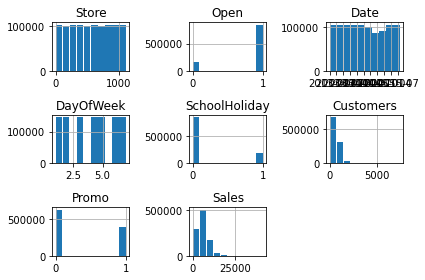

In [21]:
train.hist(rwidth=0.9)
plt.tight_layout()

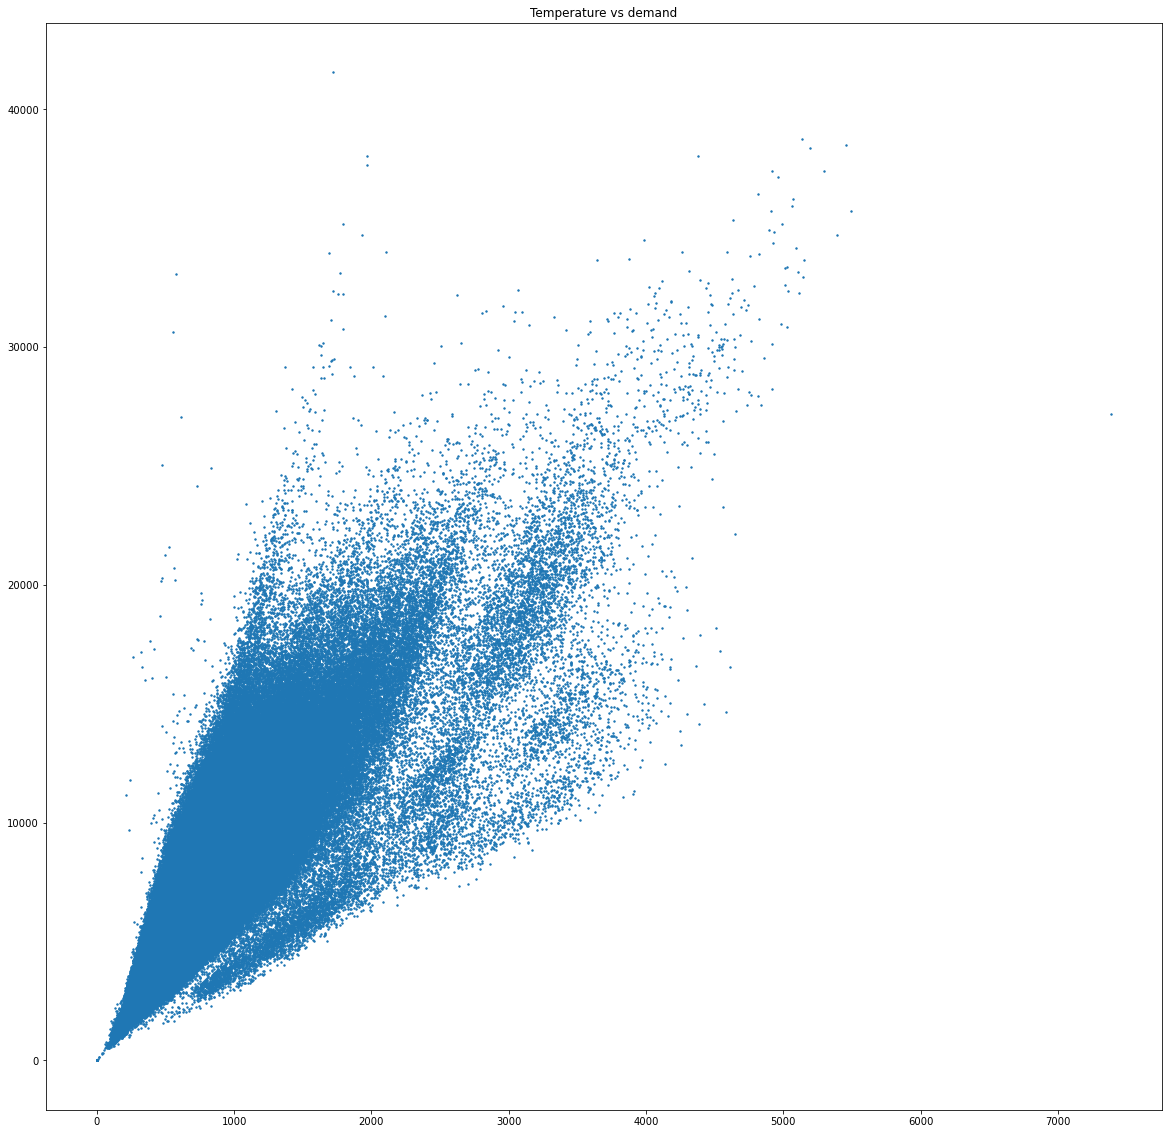

In [25]:
#Visuvalise the continues variable:
# Customer vs Sales:
plt.rcParams['figure.figsize'] = (20.0, 20.0)

plt.subplot(1,1,1)
plt.title('Temperature vs demand')
plt.scatter(train['Customers'], train['Sales'], s=2)
plt.show()